In [118]:
import pandas as pd
import numpy as np
import sklearn


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [120]:
data_sonar= pd.read_csv('sonar_Csv')

In [121]:
data_sonar

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [122]:
data_sonar.dtypes

A1       float64
A2       float64
A3       float64
A4       float64
A5       float64
A6       float64
A7       float64
A8       float64
A9       float64
A10      float64
A11      float64
A12      float64
A13      float64
A14      float64
A15      float64
A16      float64
A17      float64
A18      float64
A19      float64
A20      float64
A21      float64
A22      float64
A23      float64
A24      float64
A25      float64
A26      float64
A27      float64
A28      float64
A29      float64
A30      float64
          ...   
A32      float64
A33      float64
A34      float64
A35      float64
A36      float64
A37      float64
A38      float64
A39      float64
A40      float64
A41      float64
A42      float64
A43      float64
A44      float64
A45      float64
A46      float64
A47      float64
A48      float64
A49      float64
A50      float64
A51      float64
A52      float64
A53      float64
A54      float64
A55      float64
A56      float64
A57      float64
A58      float64
A59      float

In [123]:
data_sonar.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
A16      0
A17      0
A18      0
A19      0
A20      0
A21      0
A22      0
A23      0
A24      0
A25      0
A26      0
A27      0
A28      0
A29      0
A30      0
        ..
A32      0
A33      0
A34      0
A35      0
A36      0
A37      0
A38      0
A39      0
A40      0
A41      0
A42      0
A43      0
A44      0
A45      0
A46      0
A47      0
A48      0
A49      0
A50      0
A51      0
A52      0
A53      0
A54      0
A55      0
A56      0
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

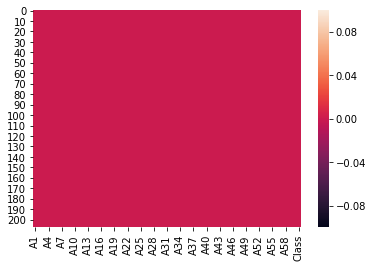

In [125]:
sns.heatmap(data_sonar.isnull())

In [126]:
data_sonar.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [127]:
x=data_sonar.iloc[:,0:-1]
x.shape

(208, 60)

In [128]:
y=data_sonar.iloc[:,-1]

In [129]:
y.shape

(208,)

In [130]:
y

0      R
1      R
2      R
3      R
4      R
5      R
6      R
7      R
8      R
9      R
10     R
11     R
12     R
13     R
14     R
15     R
16     R
17     R
18     R
19     R
20     R
21     R
22     R
23     R
24     R
25     R
26     R
27     R
28     R
29     R
      ..
178    M
179    M
180    M
181    M
182    M
183    M
184    M
185    M
186    M
187    M
188    M
189    M
190    M
191    M
192    M
193    M
194    M
195    M
196    M
197    M
198    M
199    M
200    M
201    M
202    M
203    M
204    M
205    M
206    M
207    M
Name: Class, Length: 208, dtype: object

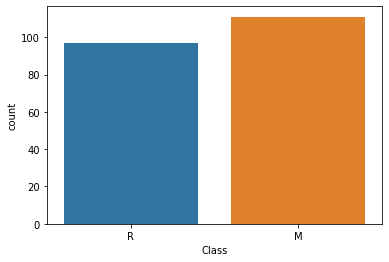

In [131]:
sns.countplot(x="Class",data=data_sonar)

In [132]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state =42,test_size=0.20)

In [134]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

In [135]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8571428571428571


[[23  3]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.81      0.81      0.81        16

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.7380952380952381


[[16 10]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.74        26
           1       0.60      0.94      0.73        16

    accuracy 

C:\Users\tiya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tiya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [136]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)
lgr.score(x_train,y_train)
predlgr=lgr.predict(x_test)
print('Accuracy score of',lgr,'is:')
print(accuracy_score(y_test,predlgr))
print('\n')
print(confusion_matrix(y_test,predlgr))
print(classification_report(y_test,predlgr))

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8571428571428571


[[23  3]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        26
           1       0.81      0.81      0.81        16

    accuracy                           0.86        42
   macro avg       0.85      0.85      0.85        42
weighted avg       0.86      0.86      0.86        42



C:\Users\tiya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
df1=pd.DataFrame(predlgr)
df1.to_csv('lgr_prediction.csv')